In [115]:
#!pip install opencv-python

In [116]:
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [117]:
os.getcwd()

'C:\\Users\\GERSON\\OneDrive - Universidad ESAN\\PROJECTS_ML'

In [118]:
ruta = 'Data\\'
data = {}
for clase in os.listdir(ruta):
    data[clase] = []
    for img in os.listdir(ruta+clase):
        data[clase].append(cv.imread(ruta+clase+'\\'+img,0))

In [119]:
data.keys()

dict_keys(['BOMBOM', 'OTROS', 'PULPO'])

In [120]:
len(data["BOMBOM"]),len(data["PULPO"]),len(data["OTROS"])

(17, 17, 17)

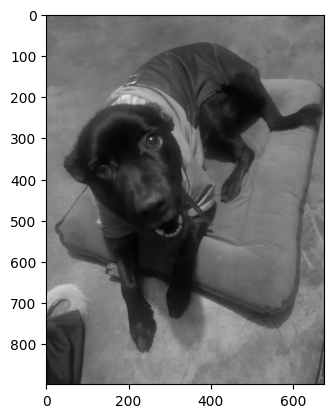

In [170]:
plt.imshow(data["BOMBOM"][1], cmap = "gray")

def SIFT(I):
    sift = cv.SIFT_create()
    _,des = sift.detectAndCompute(I,None)
    FV = np.mean(des,axis=0)
    return FV

In [123]:
import numpy as np
import cv2 as cv

def SIFT(I):
    sift = cv.SIFT_create()
    _, des = sift.detectAndCompute(I, None)
    
    # Validar que des no sea None y tenga contenido
    if des is not None and len(des) > 0:
        FV = np.mean(des, axis=0)
    else:
        FV = np.zeros(128)  # Vector nulo si no se detecta nada
    
    return FV

In [124]:
FV_DATA = {}
for clase in data:
    FV_DATA[clase] = []
    for img in data[clase]:
        #plt.imshow(img,cmap="gray")
        FV_DATA[clase].append(SIFT(img))

In [125]:
len(FV_DATA["BOMBOM"])

17

In [126]:
X = np.array(FV_DATA['BOMBOM']+FV_DATA['PULPO']+FV_DATA['OTROS'])
Y = np.array([['BOMBOM']]*17+[['PULPO']]*17+[['OTROS']]*17)

In [127]:
len(X), len(Y)

(51, 51)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.20, 
                                                    random_state=130324)

In [130]:
X_train.shape,X_test.shape

((40, 128), (11, 128))

In [131]:
"""
modelo = KNeighborsClassifier()
modelo.fit(X_train,Y_train.ravel())
rpt = modelo.predict(X_test)
accuracy_score(Y_test,rpt)
"""

'\nmodelo = KNeighborsClassifier()\nmodelo.fit(X_train,Y_train.ravel())\nrpt = modelo.predict(X_test)\naccuracy_score(Y_test,rpt)\n'

In [132]:
"""
modelo = SVC()
modelo.fit(X_train,Y_train.ravel())
rpt = modelo.predict(X_test)
accuracy_score(Y_test,rpt)
"""

'\nmodelo = SVC()\nmodelo.fit(X_train,Y_train.ravel())\nrpt = modelo.predict(X_test)\naccuracy_score(Y_test,rpt)\n'

In [133]:
"""
modelo = DecisionTreeClassifier()
modelo.fit(X_train,Y_train.ravel())
rpt = modelo.predict(X_test)
accuracy_score(Y_test,rpt)
"""

'\nmodelo = DecisionTreeClassifier()\nmodelo.fit(X_train,Y_train.ravel())\nrpt = modelo.predict(X_test)\naccuracy_score(Y_test,rpt)\n'

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, Y_train.ravel())
rpt = modelo.predict(X_test)
accuracy = accuracy_score(Y_test, rpt)

In [135]:
print(classification_report(Y_test,rpt))

              precision    recall  f1-score   support

      BOMBOM       1.00      1.00      1.00         3
       OTROS       1.00      1.00      1.00         6
       PULPO       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# Con camara 

In [137]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output #Para limpiar pantalla

webcam = cv.VideoCapture(0) 
cant_frame = int(webcam.get(cv.CAP_PROP_FRAME_COUNT))
f = int(webcam.get(cv.CAP_PROP_FRAME_HEIGHT))
c = int(webcam.get(cv.CAP_PROP_FRAME_WIDTH))
fps = webcam.get(cv.CAP_PROP_FPS)

formato = cv.VideoWriter_fourcc("m","p","4","v")
fuente = cv.FONT_HERSHEY_SIMPLEX

cv.namedWindow("ESAN",cv.WINDOW_NORMAL)
while webcam.read()[0]:
    var, frame = webcam.read()

    frame = cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    FV = SIFT(frame)

    resultado = modelo.predict([FV])[0]
    
    cv.putText(frame,resultado,(250,80),fuente,1,(255,145,0),3)
    
    cv.imshow("ESAN",frame)
    
    if cv.waitKey(1) == ord("p"):
        break

webcam.release()
cv.destroyAllWindows()

In [184]:
import cv2 as cv

# Inicializar webcam
webcam = cv.VideoCapture(0)

box_size = 200  # Tamaño del cuadro
fuente = cv.FONT_HERSHEY_SIMPLEX

cv.namedWindow("GCE", cv.WINDOW_NORMAL)

while True:
    ret, frame = webcam.read()
    if not ret:
        break

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    h, w = gray.shape
    cx, cy = w // 2, h // 2

    x1, y1 = (cx - box_size // 2), cy - box_size // 2
    x2, y2 = (cx + box_size // 2), cy + box_size // 2
    roi = gray[y1:y2, x1:x2]

    cv.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    FV = SIFT(roi)  

    try:
        resultado = modelo.predict([FV])[0]
        #print("RESULTADO",resultado)
    except:
        resultado = "No detectado"

    cv.putText(frame, f"Resultado: {resultado}", (170, 80), fuente, 1, (255, 145, 0), 2)

    cv.imshow("GCE", frame)

    if cv.waitKey(1) == ord("p"):
        break

webcam.release()
cv.destroyAllWindows()

In [140]:
"""
test = cv.imread("gerson.jpeg",0)
#plt.imshow(test,cmap="gray")
FV_hombre = SIFT(test)
modelo.predict([FV_hombre])[0]
"""

'\ntest = cv.imread("gerson.jpeg",0)\n#plt.imshow(test,cmap="gray")\nFV_hombre = SIFT(test)\nmodelo.predict([FV_hombre])[0]\n'